# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf # Library to construct neural newtorks. Low level library
from tensorflow import keras # High level library to handle tensorflow.
from tensorflow.keras.layers import Flatten, Dense, Dropout # Types of layers to use in our neural network.
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint 

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read tic-tac-toe.csv into a dataframe.
tic_tac = pd.read_csv("/content/drive/MyDrive/tic-tac-toe.csv")
tic_tac

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,False
954,o,x,o,x,x,o,x,o,x,False
955,o,x,o,x,o,x,x,o,x,False
956,o,x,o,o,x,x,x,o,x,False


In [4]:
# Inspect the dataset
for i in range(0,len(tic_tac)):
    if tic_tac.loc[i,:].value_counts()[0] > 5 or tic_tac.loc[i,:].value_counts()[1] > 4:
        print('warning')    

In [5]:
len(tic_tac)

958

In [6]:
tic_tac.columns

Index(['TL', 'TM', 'TR', 'ML', 'MM', 'MR', 'BL', 'BM', 'BR', 'class'], dtype='object')

In [7]:
# Separate the inputs and output.
x = tic_tac.iloc[:,:-1]
x
y = tic_tac['class']

In [8]:
# Convert the categorical values to numeric in all columns.
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(x)

x_enc = encoder.transform(x).toarray()
x_enc = pd.DataFrame(x_enc, columns = encoder.get_feature_names_out())

In [9]:
# Normalize the input data.

#Power Transformer
from sklearn.preprocessing import PowerTransformer, MinMaxScaler

x_tr = PowerTransformer().fit_transform(x_enc)
x_tr = pd.DataFrame(x_tr, columns = x_enc.columns)
    
#MinMaxScaler
x_mm = MinMaxScaler().fit_transform(x_tr)
x_mm = pd.DataFrame(x_mm, columns=x_enc.columns) #convert np.array to pd.DataFrame


In [10]:
x_mm

,TL_o,TL_x,TM_o,TM_x,TR_o,TR_x,ML_o,ML_x,MM_o,MM_x,MR_o,MR_x,BL_o,BL_x,BM_o,BM_x,BR_o,BR_x
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
954,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
955,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
956,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [12]:
# Split the training and test data.
from sklearn.model_selection import train_test_split

np.random.seed(10)      #fix the random number generator, useful if you are including different columns
x_train, x_test, y_train, y_test = train_test_split(x_mm,y, test_size=0.3, random_state=42)


In [137]:
x_train.reset_index(drop=True, inplace=True)

In [11]:
pd.DataFrame(y).value_counts()

class
True     626
False    332
dtype: int64

In [220]:
# Create a Sequential model.
# Compile the model using adam as the optimizer and sparse_categorical_crossentropy as the loss function. 
# For metrics, use accuracy for now.

early_stopping = EarlyStopping(patience=5) 

model = keras.Sequential()
#hidden layers
model.add(Dense(units = 16,input_dim = x_train.shape[1],activation='relu'))
model.add(Dense(units = 8,activation='relu'))
#final layer
model.add(Dense(units = 2, activation='softmax'))

model.compile(optimizer='adam', # Optimization method
              loss='sparse_categorical_crossentropy', # Error metric to minimize
              metrics='accuracy') # Error metrics to report
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 16)                304       
                                                                 
 dense_36 (Dense)            (None, 8)                 136       
                                                                 
 dense_37 (Dense)            (None, 2)                 18        
                                                                 
Total params: 458
Trainable params: 458
Non-trainable params: 0
_________________________________________________________________


In [221]:
checkpoint_path = '/content/drive/MyDrive/model.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path, # Where to save the checkpoint.
    save_freq='epoch', # How often the checkpoint file will be saved.
    save_weights_only=False, # Wether or not save only the weights of each neuron.
    verbose=1 # To display the progress
)

In [222]:
# Fit the training data.
history = model.fit(
    x_train, 
    y_train, 
    epochs=60, # Number of epochs. 
    validation_split=0.20, # Here the TRAIN set will be split in TRAIN = TRAIN_NEW + VALIDATION. TRAIN_NEW used for train and val for CV
    batch_size=20, # How many samples to input in the network before updating the weights
    verbose=2, # To display the progress.
    callbacks=[early_stopping,checkpoint])

Epoch 1/60

Epoch 1: saving model to /content/drive/MyDrive/model.hdf5
27/27 - 4s - loss: 0.6982 - accuracy: 0.5317 - val_loss: 0.6821 - val_accuracy: 0.5896 - 4s/epoch - 140ms/step
Epoch 2/60

Epoch 2: saving model to /content/drive/MyDrive/model.hdf5
27/27 - 0s - loss: 0.6493 - accuracy: 0.6138 - val_loss: 0.6513 - val_accuracy: 0.6269 - 176ms/epoch - 7ms/step
Epoch 3/60

Epoch 3: saving model to /content/drive/MyDrive/model.hdf5
27/27 - 0s - loss: 0.6225 - accuracy: 0.6642 - val_loss: 0.6346 - val_accuracy: 0.6493 - 172ms/epoch - 6ms/step
Epoch 4/60

Epoch 4: saving model to /content/drive/MyDrive/model.hdf5
27/27 - 0s - loss: 0.6009 - accuracy: 0.6978 - val_loss: 0.6224 - val_accuracy: 0.6716 - 162ms/epoch - 6ms/step
Epoch 5/60

Epoch 5: saving model to /content/drive/MyDrive/model.hdf5
27/27 - 0s - loss: 0.5838 - accuracy: 0.7090 - val_loss: 0.6103 - val_accuracy: 0.6791 - 172ms/epoch - 6ms/step
Epoch 6/60

Epoch 6: saving model to /content/drive/MyDrive/model.hdf5
27/27 - 0s - lo

In [217]:
def plot_metrics(history, metric, metric2):
    train_metrics = history.history[metric] # Get the error metric for the TRAIN set
    val_metrics = history.history['val_'+metric] # Get the error metric for the VALIDATION set

    train_metrics2 = history.history[metric2] # Get the error metric for the TRAIN set
    val_metrics2 = history.history['val_'+metric2] # Get the error metric for the VALIDATION set

    epochs = range(1, len(train_metrics) + 1) # range(1,6) -> 1,2,3,4,5
       
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
    ax1.plot(epochs, train_metrics)
    ax1.plot(epochs, val_metrics)
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel(metric)
    ax1.set_yscale('log')
    ax1.legend(["train_"+metric, 'val_'+metric])

    ax2.plot(epochs, train_metrics2)
    ax2.plot(epochs, val_metrics2)
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel(metric2)
    ax2.set_yscale('log')
    ax2.legend(["train_"+metric2, 'val_'+metric2])

    plt.show()

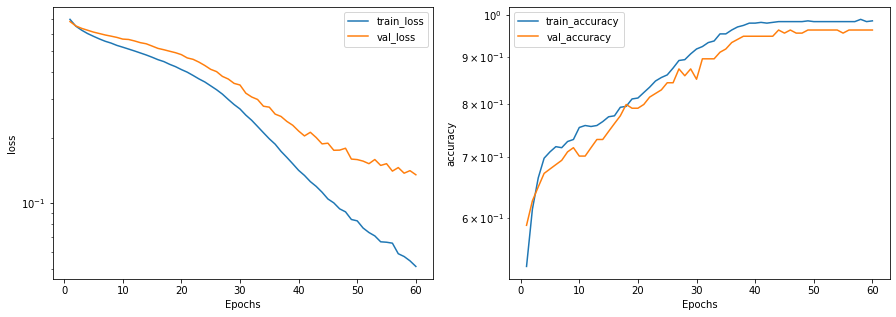

In [223]:
plot_metrics(history,'loss','accuracy')

In [76]:
# Evaluate your neural network model with the test data.

from sklearn.metrics import cohen_kappa_score, classification_report 

def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))

In [224]:
y_pred_tr = np.argmax(model.predict(x_train), axis=1).reshape(-1,1)
y_pred_te = np.argmax(model.predict(x_test), axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_tr, y_test, y_pred_te)

9/9 [==============================] - 0s 4ms/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.96
              precision    recall  f1-score   support

       False       0.98      0.97      0.97       237
        True       0.98      0.99      0.99       433

    accuracy                           0.98       670
   macro avg       0.98      0.98      0.98       670
weighted avg       0.98      0.98      0.98       670

Results obtained for the TEST SET
The Cohen's Kappa is: 0.96
              precision    recall  f1-score   support

       False       0.97      0.98      0.97        95
        True       0.99      0.98      0.99       193

    accuracy                           0.98       288
   macro avg       0.98      0.98      0.98       288
weighted avg       0.98      0.98      0.98       288



In [120]:
# Save your model as tic-tac-toe.model

import pickle
with open('/content/drive/MyDrive/tic-tac-toe_model.pkl', 'wb') as file: pickle.dump(model, file)

model = pd.read_pickle('/content/drive/MyDrive/tic-tac-toe_model.pkl')


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-28 18:31:42         2268
variables.h5                                   2023-02-28 18:31:42        22056
metadata.json                                  2023-02-28 18:31:42           64
Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-28 18:31:42         2268
variables.h5                                   2023-02-28 18:31:42        22056
metadata.json                             

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [180]:
pd.DataFrame(y_train).value_counts()

class
True     433
False    237
dtype: int64

In [175]:
def check_predictions(x,y,row):
  y=list(y)[row]
  x = x.loc[row:row,:]

  prediction = np.argmax(model.predict(x), axis=1).reshape(-1,1)
  if prediction==1: p = True
  else: p = False

  if y == p: a='right'
  else: a='wrong'

  return print('Result is {} and prediction is {}'.format(y,a))

In [174]:
check_predictions(x_train,y_train,228)

True
1/1 [==============================] - 0s 31ms/step
[[1]]
True
Result is True and prediction is right


In [176]:
check_predictions(x_train,y_train,57)

1/1 [==============================] - 0s 22ms/step
Result is True and prediction is right


In [181]:
check_predictions(x_train,y_train,558)

1/1 [==============================] - 0s 70ms/step
Result is False and prediction is right


In [178]:
check_predictions(x_train,y_train,5)

1/1 [==============================] - 0s 21ms/step
Result is True and prediction is right


In [183]:
check_predictions(x_train,y_train,428)

1/1 [==============================] - 0s 98ms/step
Result is False and prediction is right


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

Epoch 1/60
14/27 [==============>...............] - ETA: 0s - loss: 0.7643 - accuracy: 0.3786 
Epoch 1: saving model to /content/drive/MyDrive/model.hdf5
27/27 [==============================] - 2s 27ms/step - loss: 0.7326 - accuracy: 0.3993 - val_loss: 0.6811 - val_accuracy: 0.5597
Epoch 2/60
24/27 [=========================>....] - ETA: 0s - loss: 0.6547 - accuracy: 0.6792
Epoch 2: saving model to /content/drive/MyDrive/model.hdf5
27/27 [==============================] - 0s 10ms/step - loss: 0.6537 - accuracy: 0.6791 - val_loss: 0.6421 - val_accuracy: 0.7388
Epoch 3/60
23/27 [========================>.....] - ETA: 0s - loss: 0.5952 - accuracy: 0.7891
Epoch 3: saving model to /content/drive/MyDrive/model.hdf5
27/27 [==============================] - 0s 9ms/step - loss: 0.5995 - accuracy: 0.7649 - val_loss: 0.5847 - val_accuracy: 0.7164
Epoch 4/60
25/27 [==========================>...] - ETA: 0s - loss: 0.5377 - accuracy: 0.7760
Epoch 4: saving model to /content/drive/MyDrive/model.hdf

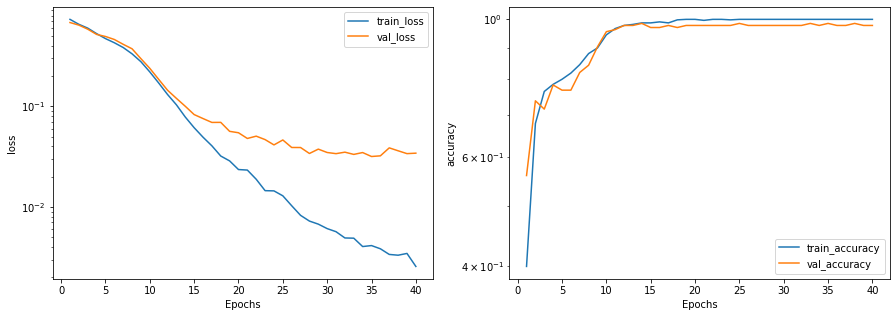

9/9 [==============================] - 0s 2ms/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.99
              precision    recall  f1-score   support

       False       1.00      0.99      0.99       237
        True       1.00      1.00      1.00       433

    accuracy                           1.00       670
   macro avg       1.00      0.99      1.00       670
weighted avg       1.00      1.00      1.00       670

Results obtained for the TEST SET
The Cohen's Kappa is: 0.97
              precision    recall  f1-score   support

       False       1.00      0.96      0.98        95
        True       0.98      1.00      0.99       193

    accuracy                           0.99       288
   macro avg       0.99      0.98      0.98       288
weighted avg       0.99      0.99      0.99       288



In [241]:
#adding more layers
early_stopping = EarlyStopping(patience=5) 

model2 = keras.Sequential()
#hidden layers
model2.add(Dense(units = 64,input_dim = x_train.shape[1],activation='relu'))
model2.add(Dense(units = 16,activation='relu'))
model2.add(Dense(units = 8,activation='relu'))
#final layer
model2.add(Dense(units = 2, activation='softmax'))

model2.compile(optimizer='adam', # Optimization method
              loss='sparse_categorical_crossentropy', # Error metric to minimize
              metrics='accuracy') # Error metrics to report

history2 = model2.fit(
    x_train, 
    y_train, 
    epochs=60, # Number of epochs. 
    validation_split=0.20, # Here the TRAIN set will be split in TRAIN = TRAIN_NEW + VALIDATION. TRAIN_NEW used for train and val for CV
    batch_size=20, # How many samples to input in the network before updating the weights
    callbacks=[early_stopping,checkpoint])

plot_metrics(history2,'loss','accuracy')

y_pred_tr2 = np.argmax(model2.predict(x_train), axis=1).reshape(-1,1)
y_pred_te2 = np.argmax(model2.predict(x_test), axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_tr2, y_test, y_pred_te2)

Epoch 1/60
21/27 [======================>.......] - ETA: 0s - loss: 0.7034 - accuracy: 0.4833 
Epoch 1: saving model to /content/drive/MyDrive/model.hdf5
27/27 [==============================] - 2s 23ms/step - loss: 0.6986 - accuracy: 0.5149 - val_loss: 0.6846 - val_accuracy: 0.6194
Epoch 2/60
24/27 [=========================>....] - ETA: 0s - loss: 0.6744 - accuracy: 0.6646
Epoch 2: saving model to /content/drive/MyDrive/model.hdf5
27/27 [==============================] - 0s 6ms/step - loss: 0.6748 - accuracy: 0.6567 - val_loss: 0.6655 - val_accuracy: 0.7015
Epoch 3/60
15/27 [===============>..............] - ETA: 0s - loss: 0.6660 - accuracy: 0.6933
Epoch 3: saving model to /content/drive/MyDrive/model.hdf5
27/27 [==============================] - 0s 8ms/step - loss: 0.6560 - accuracy: 0.6996 - val_loss: 0.6415 - val_accuracy: 0.7239
Epoch 4/60
18/27 [===================>..........] - ETA: 0s - loss: 0.6369 - accuracy: 0.7250
Epoch 4: saving model to /content/drive/MyDrive/model.hdf5

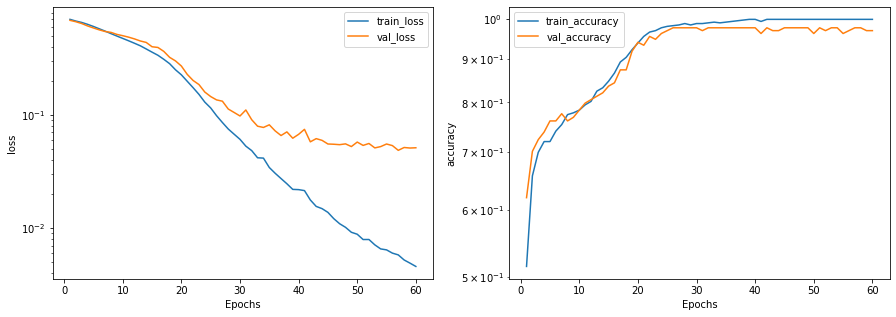

9/9 [==============================] - 0s 2ms/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.99
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       237
        True       1.00      1.00      1.00       433

    accuracy                           0.99       670
   macro avg       0.99      0.99      0.99       670
weighted avg       0.99      0.99      0.99       670

Results obtained for the TEST SET
The Cohen's Kappa is: 0.98
              precision    recall  f1-score   support

       False       1.00      0.97      0.98        95
        True       0.98      1.00      0.99       193

    accuracy                           0.99       288
   macro avg       0.99      0.98      0.99       288
weighted avg       0.99      0.99      0.99       288



In [242]:
#decreasing learning rate
model2 = keras.Sequential()
#hidden layers
model2.add(Dense(units = 64,input_dim = x_train.shape[1],activation='relu'))
model2.add(Dense(units = 16,activation='relu'))
model2.add(Dense(units = 8,activation='relu'))
#final layer
model2.add(Dense(units = 2, activation='softmax'))

special_Adam = tf.keras.optimizers.Adam(
    learning_rate=0.0005,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
)

model2.compile(optimizer=special_Adam, # Optimization method
              loss='sparse_categorical_crossentropy', # Error metric to minimize
              metrics='accuracy') # Error metrics to report

history2 = model2.fit(
    x_train, 
    y_train, 
    epochs=60, # Number of epochs. 
    validation_split=0.20, # Here the TRAIN set will be split in TRAIN = TRAIN_NEW + VALIDATION. TRAIN_NEW used for train and val for CV
    batch_size=20, # How many samples to input in the network before updating the weights
    callbacks=[early_stopping,checkpoint])

plot_metrics(history2,'loss','accuracy')

y_pred_tr2 = np.argmax(model2.predict(x_train), axis=1).reshape(-1,1)
y_pred_te2 = np.argmax(model2.predict(x_test), axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_tr2, y_test, y_pred_te2)

Epoch 1/500
24/27 [=========================>....] - ETA: 0s - loss: 0.6965 - accuracy: 0.5750
Epoch 1: saving model to /content/drive/MyDrive/model.hdf5
27/27 [==============================] - 4s 37ms/step - loss: 0.6948 - accuracy: 0.5951 - val_loss: 0.6801 - val_accuracy: 0.6940
Epoch 2/500
18/27 [===================>..........] - ETA: 0s - loss: 0.6712 - accuracy: 0.7556
Epoch 2: saving model to /content/drive/MyDrive/model.hdf5
27/27 [==============================] - 0s 7ms/step - loss: 0.6675 - accuracy: 0.7388 - val_loss: 0.6726 - val_accuracy: 0.6567
Epoch 3/500
23/27 [========================>.....] - ETA: 0s - loss: 0.6443 - accuracy: 0.7239
Epoch 3: saving model to /content/drive/MyDrive/model.hdf5
27/27 [==============================] - 0s 6ms/step - loss: 0.6438 - accuracy: 0.7369 - val_loss: 0.6477 - val_accuracy: 0.7313
Epoch 4/500
22/27 [=======================>......] - ETA: 0s - loss: 0.6101 - accuracy: 0.7523
Epoch 4: saving model to /content/drive/MyDrive/model.h

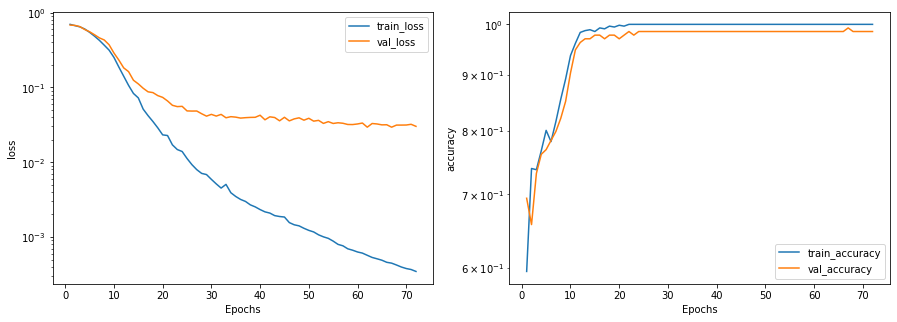

9/9 [==============================] - 0s 3ms/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.99
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       237
        True       1.00      1.00      1.00       433

    accuracy                           1.00       670
   macro avg       1.00      1.00      1.00       670
weighted avg       1.00      1.00      1.00       670

Results obtained for the TEST SET
The Cohen's Kappa is: 0.98
              precision    recall  f1-score   support

       False       1.00      0.97      0.98        95
        True       0.98      1.00      0.99       193

    accuracy                           0.99       288
   macro avg       0.99      0.98      0.99       288
weighted avg       0.99      0.99      0.99       288



In [243]:
# increasing epochs
model2 = keras.Sequential()
#hidden layers
model2.add(Dense(units = 64,input_dim = x_train.shape[1],activation='relu'))
model2.add(Dense(units = 16,activation='relu'))
model2.add(Dense(units = 8,activation='relu'))
#final layer
model2.add(Dense(units = 2, activation='softmax'))

model2.compile(optimizer='adam', # Optimization method
              loss='sparse_categorical_crossentropy', # Error metric to minimize
              metrics='accuracy') # Error metrics to report

history2 = model2.fit(
    x_train, 
    y_train, 
    epochs=500, # Number of epochs. 
    validation_split=0.20, # Here the TRAIN set will be split in TRAIN = TRAIN_NEW + VALIDATION. TRAIN_NEW used for train and val for CV
    batch_size=20, # How many samples to input in the network before updating the weights
    callbacks=[early_stopping,checkpoint])

plot_metrics(history2,'loss','accuracy')

y_pred_tr2 = np.argmax(model2.predict(x_train), axis=1).reshape(-1,1)
y_pred_te2 = np.argmax(model2.predict(x_test), axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_tr2, y_test, y_pred_te2)

**Which approach(es) did you find helpful to improve your model performance?**

In [244]:
# adding more layers
# decreasing learning rate
#increasing epochs